# Atividade 1 - Mandacaru.dev - Cacto - Revisão de Machine Learning

**Nome**: William Bruno Sales de Paula Lima
**UFC - CAMPUS SOBRAL**
**Curso Mandacaru.dev - Módulo cacto - Data Science**

## Análise de fraudes bancárias

dataset: [link_dataset](https://www.kaggle.com/datasets/volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary)

"Banks are often exposed to fraud transactions and constantly improve systems to track them."

## Análise e limpeza dos dados

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/fraud_detection_bank_dataset.csv')

Renomeando a coluna 'Unnamed: 0' para 'Idx' e a utilizando como index com o método `set_index`

In [ ]:
df.rename(columns={'Unnamed: 0': 'Idx'}, inplace=True)
df.set_index('Idx', inplace=True)
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
Idx,,,,,,,,,,,,,,,,,,,,,
0,9,1354,0,18,0,1,7,9,0,0,...,0,0,0,1,1,0,0,0,49,1
1,0,239,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,0,260,0,4,0,3,6,0,0,0,...,0,0,0,1,1,0,0,0,56,1
3,17,682,0,1,0,0,8,17,0,0,...,0,1,0,1,1,0,0,0,65,1
4,1,540,0,2,0,1,7,1,0,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,0,134,0,2,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,4,393,1,1,0,0,-1,4,0,0,...,0,1,0,0,0,0,0,0,45,0


Analisando algumas métricas do dataset:

In [ ]:
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Número de linhas: 20468
Número de colunas: 113


Visualizando os valores únicos que a coluna `target` pode assumir:

In [ ]:
print(df['targets'].unique())

[1 0]


Temos 20468 observações e 113 colunas, sendo 112 delas relacionadas a features e uma delas relacionada a target, provavelmente se o indivíduo estudado pela observação cometeu fraude bancária (1) ou não (0).

Analisemos se temos valores `NaN` no dataframe:

In [ ]:
columns_with_nan = [column for column in df.columns if df[column].isna().any()]

df[columns_with_nan].isna().sum()

Series([], dtype: float64)

Como o resultado acima nos retornou uma `pandas Series` vazia, significa que não temos valores NaN no dataframe, ótimo!

Agora, verifiquemos quais colunas do dataframe possuem todas as entradas zeros:

In [ ]:
df.loc[:, (df == 0).all()]

,col_8,col_9,col_10,col_11,col_12,col_18,col_19,col_20,col_21,col_35,col_51,col_52,col_53,col_70,col_71
Idx,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Várias colunas possuem todas as entradas com valores zero...verifiquemos isso como uma lista com os nomes destas colunas:

In [ ]:
columns_with_all_zero_entries = df.loc[:, (df == 0).all()].columns.to_list()
print(f'Quantidade de colunas com todos os valores zeros: {len(columns_with_all_zero_entries)}')
print(columns_with_all_zero_entries)

Quantidade de colunas com todos os valores zeros: 15
['col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_18', 'col_19', 'col_20', 'col_21', 'col_35', 'col_51', 'col_52', 'col_53', 'col_70', 'col_71']


Colunas com todos os valores nulos simplesmente não agregam nada em nossas análises e em nossos modelos. Portanto, podemos retirar (dropar) estas colunas do dataframe

In [ ]:
df.drop(columns_with_all_zero_entries, axis=1, inplace=True)

In [ ]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
Idx,,,,,,,,,,,,,,,,,,,,,
0,9,1354,0,18,0,1,7,9,0,1,...,0,0,0,1,1,0,0,0,49,1
1,0,239,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,0,260,0,4,0,3,6,0,0,1,...,0,0,0,1,1,0,0,0,56,1
3,17,682,0,1,0,0,8,17,0,0,...,0,1,0,1,1,0,0,0,65,1
4,1,540,0,2,0,1,7,1,0,1,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,0,134,0,2,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,4,393,1,1,0,0,-1,4,0,0,...,0,1,0,0,0,0,0,0,45,0


Agora, temos um dataframe com a mesma quantidade de linhas e 15 colunas a menos. Muto bem...

Agora, devemos analisar a correlação entre variáveis do dataframe.

Colunas com alta correlação serão ruins para o modelo de ML, pois representam dados redundantes. Os problemas causados por isso são vários, como perda de eficiência no processo de convergência do algoritmo, viés, uma pequena mudança em uma variável pode causar uma grande mudança em outra, sendo que o ideal seria o algoritmo "mexer" com cada variável independente de forma...independente!

[Artigo Correlação com ML](https://medium.com/analytics-vidhya/correlation-and-machine-learning-fee0ffc5faac)

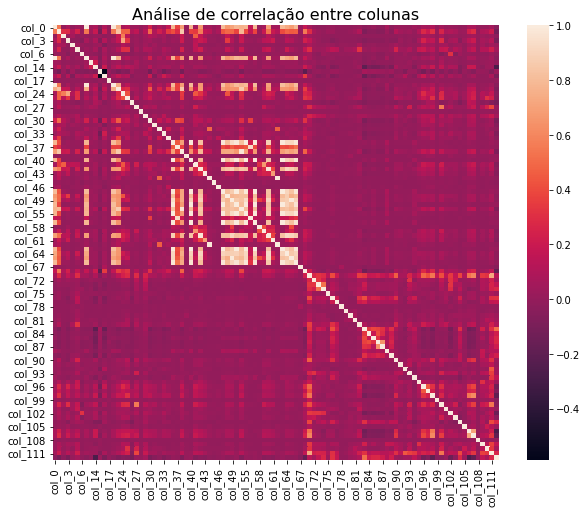

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Análise de correlação entre colunas', fontsize=16)

sns.heatmap(df.corr())
plt.show()

Obviamente, o heatmap acima não nos permite inferir muito a respeito de todas as colunas com alta correlação. No entanto, podemos perceber (nos quadrados mais brancos) que há muitas variáveis com correlação alta, acima de 0.95. Além disso, perceba que estas variáveis são simétricas em relação à diagonal principal da matriz.

In [ ]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [ ]:
print(f'Colunas com correlação absoluta maior que 0.95: {to_drop}')
print(f'Quantidade de colunas com alta correlação: {len(to_drop)}')

Colunas com correlação absoluta maior que 0.95: ['col_7', 'col_22', 'col_40', 'col_47', 'col_50', 'col_54', 'col_55', 'col_57', 'col_60', 'col_62', 'col_63', 'col_65', 'col_66']
Quantidade de colunas com alta correlação: 13


In [ ]:
df_droped = df.drop(to_drop, axis=1)

In [ ]:
df_droped

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_13,col_14,col_15,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
Idx,,,,,,,,,,,,,,,,,,,,,
0,9,1354,0,18,0,1,7,0,1,0,...,0,0,0,1,1,0,0,0,49,1
1,0,239,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,0,260,0,4,0,3,6,0,1,1,...,0,0,0,1,1,0,0,0,56,1
3,17,682,0,1,0,0,8,0,0,0,...,0,1,0,1,1,0,0,0,65,1
4,1,540,0,2,0,1,7,0,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,0,134,0,2,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,4,393,1,1,0,0,-1,0,0,0,...,0,1,0,0,0,0,0,0,45,0


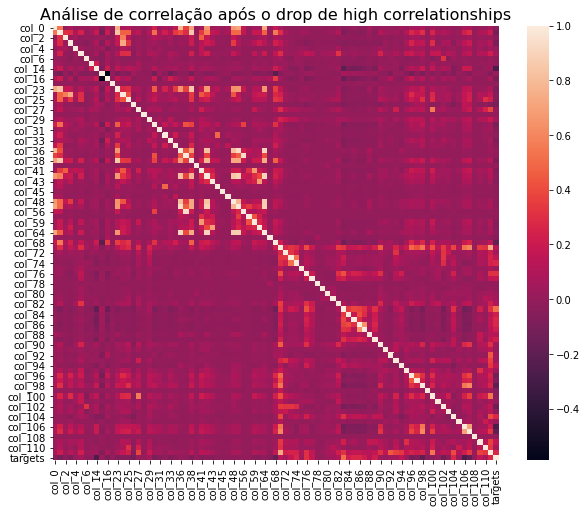

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Análise de correlação após o drop de high correlationships', fontsize=16)

sns.heatmap(df_droped.corr())
plt.show()

Pelo heatmap, podemos perceber que não temos mais aqueles conjuntos com enormes áreas com cores esbranquiçadas (exceto pela diagonal principal), que significavam áreas com alta correlação de variáveis.

Agora, com as colunas com alta correlação dropadas, podemos dar início a construção do algoritmo de ML, trabalhando com ``df_droped``, uma mistura de drops de colunas com todas as entradas zeros e de colunas com altas correlações.

### Desbalanceamento de Classes

Após realizar a limpeza do dataframe, possuímos menos colunas excluindo dados redundantes. No entanto, temos agora um desbalanceamento na nossa coluna de targets, pois como veremos a seguir temos muito mais dados com target 0 do que target 1. Isto é um problema pois os modelos de ML irão enviesar suas predições para targets com valores 0, errando mais em predições de targets 1 diminuindo a acurácia do modelo

In [ ]:
count_of_1s = 0
count_of_0s = 0

for element in df_droped['targets']:
  if element == 1:
    count_of_1s += 1
  else:
    count_of_0s += 1
print(f'Count of 1s on target: {count_of_1s}')
print(f'Count of 0s on target: {count_of_0s}')

Count of 1s on target: 5438
Count of 0s on target: 15030


## Construção dos Algoritmos de Classificação

Primeiramente, importamos as bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Revisamos nossos dados

In [ ]:
# Revisemos os nossos dados
df_droped.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_13,col_14,col_15,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
Idx,,,,,,,,,,,,,,,,,,,,,
0,9,1354,0,18,0,1,7,0,1,0,...,0,0,0,1,1,0,0,0,49,1
1,0,239,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,0,260,0,4,0,3,6,0,1,1,...,0,0,0,1,1,0,0,0,56,1
3,17,682,0,1,0,0,8,0,0,0,...,0,1,0,1,1,0,0,0,65,1
4,1,540,0,2,0,1,7,0,1,0,...,0,0,0,1,1,0,0,0,175,1


Dividimos nossas features em X e os alvos em y

In [ ]:
# X são nossos parâmetros
X = df_droped.drop('targets', axis=1)
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_13,col_14,col_15,...,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
Idx,,,,,,,,,,,,,,,,,,,,,
0,9,1354,0,18,0,1,7,0,1,0,...,4,0,0,0,1,1,0,0,0,49
1,0,239,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,55
2,0,260,0,4,0,3,6,0,1,1,...,1,0,0,0,1,1,0,0,0,56
3,17,682,0,1,0,0,8,0,0,0,...,1,0,1,0,1,1,0,0,0,65
4,1,540,0,2,0,1,7,0,1,0,...,1,0,0,0,1,1,0,0,0,175


In [ ]:
# y é o alvo de nossa classificação
y = df_droped.targets 
y

Idx
0        1
1        1
2        1
3        1
4        1
        ..
20463    0
20464    0
20465    0
20466    0
20467    0
Name: targets, Length: 20468, dtype: int64

Agora, dividimos X e y em dados de treino e teste, com 20% das amostras destinados aos dados de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
print(f'X train shape: {X_train.shape}') 
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (16374, 84)
X test shape: (4094, 84)
y train shape: (16374,)
y test shape: (4094,)


Perceba que os dois últimos prints não possuem o valor da coluna pois a mesma é um vetor unidimensional, contendo apenas os valores de targets

### KNN

Uma abordagem prática seria aplicar cross-validação para encontrar o melhor valor de 'k' neighbors no algoritmo KNN para realizar a classificação dos dados de teste após o algoritmo ter sido treinado com os dados de treino e validação.

Criamos uma função que recebe `n_neighbors` como argumento, criando assim uma pipeline com o modelo `knn` com n vizinhos mais próximos igual ao argumento recebido. Em seguida, os scores obtidos da função `cross_val_score` são multiplicados por -1 pois ela irá retornar o erro médio absoluto das predições.

A função cross_val_score realiza a k fold cross validation com 10 folds separando estes folds do conjunto de treinamento

In [ ]:
def get_knn_cross_val_f1_score(n_neighbors):
  """
  Returns the mean of the f1 scores for k-fold cross validation method
  for a pipeline containing KNN model for n_neighbors

  ARGS
  ------------------------------------------------------------------------------
  :n_neighbors: number of neighbors used on KNN model definition

  RETURN:
  ------------------------------------------------------------------------------
  :array of f1 mean and std: array containing f1 scores mean and standard deviation
  after the cross validation process
  """

  my_pipeline = Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=n_neighbors))])
  f1_scores = cross_val_score(my_pipeline, X_train, y_train, cv=10, scoring='f1')

  return [f1_scores.mean(), f1_scores.std()]

In [ ]:
# Results é um dicionário: n_neighbors: mean f1 score
results = {}
k_choices = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

for n_neighbors in k_choices:
  results[n_neighbors] = get_knn_cross_val_f1_score(n_neighbors)

In [ ]:
results

{1: [0.6487208546741003, 0.012680685630877483],
 5: [0.6907004792009691, 0.012292014236879424],
 10: [0.683046294725542, 0.012950123250626208],
 15: [0.6874543814468683, 0.008513826118740965],
 20: [0.6820490405643698, 0.010229233777921292],
 25: [0.6827432813282732, 0.010439629741114679],
 30: [0.6740306797498934, 0.012985194725804956],
 35: [0.6749241748190462, 0.011846192493623736],
 40: [0.6697051746126743, 0.011133159836894689],
 45: [0.6704772259243947, 0.01237878058128991],
 50: [0.6669262021631254, 0.011297322271888526],
 55: [0.6685671207246714, 0.012857180531397738],
 60: [0.6629709402383551, 0.013393110713221112],
 65: [0.6647937045006402, 0.010664298615421727],
 70: [0.6623791831449657, 0.012055719417120662]}

Pela lista, percebemos que k=15 é uma boa escolha pois resultou em uma boa média para a métrica do score f1 e também possui um desvio padrão menor do que os dos demais. Ou seja: as métricas f1 se concentraram mais entorno daquele valor (~0.69) do que nos outros valores de k

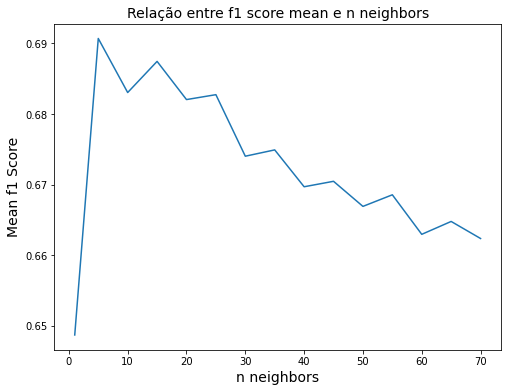

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Relação entre f1 score mean e n neighbors', fontsize=14)
plt.xlabel('n neighbors', fontsize=14)
plt.ylabel('Mean f1 Score', fontsize=14)

plt.plot(list(results.keys()), np.array(list(results.values()))[:, 0])

plt.show()

Observando apenas a média dos valores de f1, k=5 seria o ideal, mas iremos escolher k=15 pelos motivos já abordados anteriormente

In [ ]:
best_n_neighbors = 15
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

In [ ]:
knn.fit(X_train, y_train) # Fittando o modelo

KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.score(X_test, y_test) # Score do modelo ~ 86% de acurácia

0.8575964826575476

In [ ]:
y_preds = knn.predict(X_test) # Obtendo as predições

In [ ]:
cm = confusion_matrix(y_test, y_preds) # Matriz de confusão
print(cm)

[[2839  201]
 [ 382  672]]


In [ ]:
print(classification_report(y_test, y_preds)) # Classification report do modelo

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3040
           1       0.77      0.64      0.70      1054

    accuracy                           0.86      4094
   macro avg       0.83      0.79      0.80      4094
weighted avg       0.85      0.86      0.85      4094



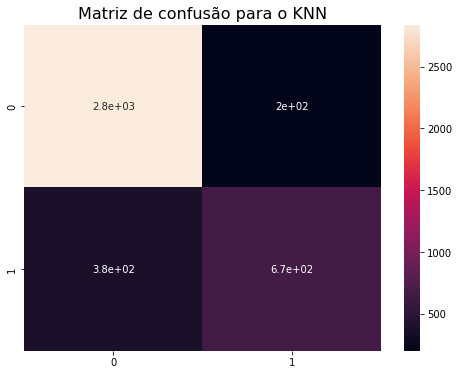

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Matriz de confusão para o KNN', fontsize=16)

sns.heatmap(cm, annot=True)

plt.show()

Analisando o classification report para o KNN percebemos que o modelo consegue prever bem o target 0, mas não o target 1. Isto se deve ao desbalanceamento de dados do nosso dataframe, como bem apontado anteriormente. Tentaremos contornar este problema...

### Logistic Regressor

Como temos apenas dois valores possíveis para a coluna de targets, podemos aplicar regressão logística com a função sigmoide. Aplicando a função a uma reta conseguida por regressão linear, temos uma espécie de "função de ativação", que retorna uma probabilidade entre 0 e 1 (inclusivos). Dependendo desse valor nesse intervalo, o dado é classificado como uma das duas classes possíveis.

[How, when and why should we normalize/standardize our data](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Standardization%20is%20useful%20when%20your,regression%2C%20and%20linear%20discriminant%20analysis.)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) # Normalizando valores de X_train
X_test_scaled = scaler.transform(X_test) # Normalizando valores de X_test

In [ ]:
print(f'Mean of X train scaled: {X_train_scaled.mean()}') # Tende a zero
print(f'Standard Deviation of X train scaled: {X_train_scaled.std()}') # Tende a um
print(f'Mean of X train scaled: {X_test_scaled.mean()}') # Tende a zero
print(f'Standard Deviation of X train scaled: {X_test_scaled.std()}') # Tende a um

Mean of X train scaled: -1.6138648281789312e-17
Standard Deviation of X train scaled: 0.9940297973880052
Mean of X train scaled: 0.0034315681005793464
Standard Deviation of X train scaled: 0.949338524383814


Agora, fazemos o mesmo processo que no classificador KNN: criamos uma pipeline com nosso modelo para performar melhor, aplicamos-a no `cross_val_score`, retornando as métricas f1 e retornamos as médias e os desvios padrão na função `get_logreg_cross_val_f1_score`

In [ ]:
def get_logreg_cross_val_f1_score(max_iter):
  """
  Function that returns the mean of f1 scores given a Logistic Regression model
  with max_iter param given as the argument recieved on the function

  ARGS:
  ------------------------------------------------------------------------------
  :max_iter: max iterations for the convergency of the Logistic Regression model

  RETURN:
  ------------------------------------------------------------------------------
  :array of f1 mean and std: array containing f1 scores mean and standard deviation
  after the cross validation process
  """
  my_pipeline = Pipeline(steps=[('model', LogisticRegression(max_iter=max_iter))])
  f1_scores = cross_val_score(my_pipeline, X_train_scaled, y_train, scoring='f1')

  return [f1_scores.mean(), f1_scores.std()]

In [ ]:
# results_logreg é um dicionário: max_iter: mean f1 score

max_iter_choices = [150, 200, 250, 300, 350, 400, 450, 500]
results_logreg = {}
for max_iter in max_iter_choices:
  results_logreg[max_iter] = get_logreg_cross_val_f1_score(max_iter)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{1: [0.6487208546741003, 0.012680685630877483], 5: [0.6907004792009691, 0.012292014236879424], 10: [0.683046294725542, 0.012950123250626208], 15: [0.6874543814468683, 0.008513826118740965], 20: [0.6820490405643698, 0.010229233777921292], 25: [0.6827432813282732, 0.010439629741114679], 30: [0.6740306797498934, 0.012985194725804956], 35: [0.6749241748190462, 0.011846192493623736], 40: [0.6697051746126743, 0.011133159836894689], 45: [0.6704772259243947, 0.01237878058128991], 50: [0.6669262021631254, 0.011297322271888526], 55: [0.6685671207246714, 0.012857180531397738], 60: [0.6629709402383551, 0.013393110713221112], 65: [0.6647937045006402, 0.010664298615421727], 70: [0.6623791831449657, 0.012055719417120662]}


In [ ]:
results_logreg

{150: [0.739813054621995, 0.009438839429231533],
 200: [0.7400100105390613, 0.009390805316590532],
 250: [0.7400100105390613, 0.009390805316590532],
 300: [0.7400100105390613, 0.009390805316590532],
 350: [0.7400100105390613, 0.009390805316590532],
 400: [0.7400100105390613, 0.009390805316590532],
 450: [0.7400100105390613, 0.009390805316590532],
 500: [0.7400100105390613, 0.009390805316590532]}

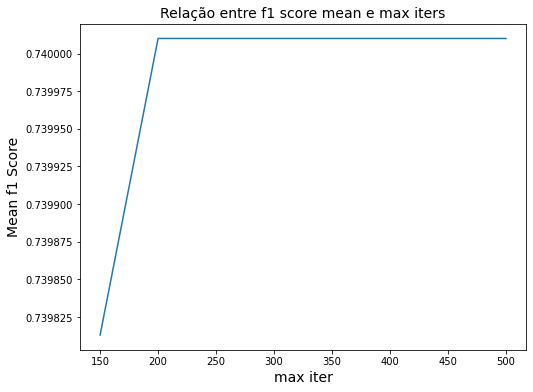

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Relação entre f1 score mean e max iters', fontsize=14)
plt.xlabel('max iter', fontsize=14)
plt.ylabel('Mean f1 Score', fontsize=14)

plt.plot(list(results_logreg.keys()), np.array(list(results_logreg.values()))[:, 0])

plt.show()

Portanto, visualizando o resultado da variável `results_logreg`, que consiste em um dicionário cujas chaves são os valores escolhidos para o número máximo de iterações para convergência da função da perda da logistic regression e cada valor correspondendo em um array com a primeira posição sendo o score f1 médio para a cross validação com aquele valor de max_iter e seu desvio padrão.

Assim, percebemos que a partir do valor 200 para max_iter, não há mudanças no valor médio de f1, provavelmente indicando que os dados fazem o modelo cair em um mínimo local

In [ ]:
best_max_iter = 200
logreg = LogisticRegression(max_iter=best_max_iter) # Instanciando um logreg com o melhor max_iter

In [ ]:
logreg.fit(X_train_scaled, y_train) # Ajustando o modelo

LogisticRegression(max_iter=200)

In [ ]:
y_preds_logreg = logreg.predict(X_test_scaled) # Capturando as predições

In [ ]:
cm_logreg = confusion_matrix(y_test, y_preds) # Gerando a matriz de confusão

In [ ]:
print(cm_logreg)

[[2954   86]
 [ 373  681]]


In [ ]:
print(classification_report(y_test, y_preds)) # Classification report para logreg

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3040
           1       0.89      0.65      0.75      1054

    accuracy                           0.89      4094
   macro avg       0.89      0.81      0.84      4094
weighted avg       0.89      0.89      0.88      4094



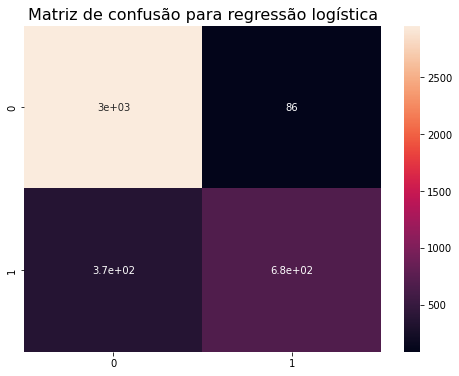

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Matriz de confusão para regressão logística', fontsize=16)

sns.heatmap(cm_logreg, annot=True)
plt.show()

Portanto, percebemos que escolher a regressão logística como classificador dos dados foi uma opção que resultou em um escore f1 ligeiramente maior para a classe com menos dados no dataframe (1) em relação ao escore f1 para a classe 0, mas ainda podemos melhorar isso!

### Random Forests

Utilizaremos random forest como alternativa para contornar o desbalanceamento de dados sem ter de realizar uma reamostragem nos mesmos.

[Dealing with imbalanced data](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Standardization%20is%20useful%20when%20your,regression%2C%20and%20linear%20discriminant%20analysis.)

In [ ]:
def get_random_forest_f1_score(n_estimators):
  """
  This function returns an array of f1 scores mean and standard deviation of the
  f1 scores returned by the cross_val_function after applying a pipeline that
  contains a Random Forest Classifier model with n_estimators (args)

  ARGS
  ------------------------------------------------------------------------------
  :n_estimators: n estimators for the random forest classifier

  RETURN:
  ------------------------------------------------------------------------------
  :array of f1 mean and std: array containing f1 scores mean and standard deviation
  after the cross validation process
  """
  my_pipeline = Pipeline(steps=[('model', RandomForestClassifier(n_estimators=n_estimators))])
  f1_scores = cross_val_score(my_pipeline, X_train, y_train, scoring='f1')

  return [f1_scores.mean(), f1_scores.std()]

In [ ]:
# results_rf é um dicionário: n_estimators: mean f1 score

results_rf = {}
n_estimators_choices = [100, 150, 200, 250, 300, 350, 400, 450, 500]

for n_estimator in n_estimators_choices:
  results_rf[n_estimator] = get_random_forest_f1_score(n_estimator)

In [ ]:
results_rf

{100: [0.8665652406384984, 0.005212242481523471],
 150: [0.8664923745584566, 0.00369866764368032],
 200: [0.8666979091814069, 0.0049597913416097985],
 250: [0.8677673036901066, 0.0033141031952825407],
 300: [0.8664052714911872, 0.003643043007789938],
 350: [0.8679845513644541, 0.0036016532161775947],
 400: [0.8666200364441028, 0.004487002723835849],
 450: [0.868391422504369, 0.004414554747510371],
 500: [0.8689756789695224, 0.0035339289499936705]}

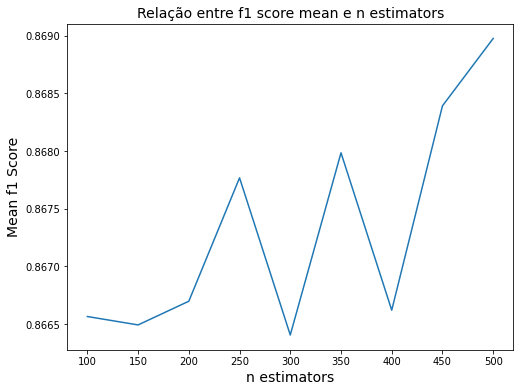

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Relação entre f1 score mean e n estimators', fontsize=14)
plt.xlabel('n estimators', fontsize=14)
plt.ylabel('Mean f1 Score', fontsize=14)

plt.plot(list(results_rf.keys()), np.array(list(results_rf.values()))[:, 0])

plt.show()

Analisando o gráfico, percebemos que os valores de n_estimators iguais a 250, 350 e 450 são os possíveis melhores valores para a Random Forest. No entanto, 450 é um valor que não melhora tanto a média f1 do modelo, tendo diferença de apenas 1% da média f1 com 350 estimadores.

Assim, escolhemos o valor de 350 estimadores para a Random Forest a ser aplicada em nossos dados

In [ ]:
rf = RandomForestClassifier(n_estimators=350) # Instanciando uma Random Forest com o melhor valor de n_estimator

In [ ]:
rf.fit(X_train, y_train) # Ajustando o modelo

RandomForestClassifier(n_estimators=350)

In [ ]:
y_preds_rf = rf.predict(X_test) # Capturando predições

In [ ]:
print(classification_report(y_test, y_preds_rf)) # Classification report

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3040
           1       0.90      0.83      0.87      1054

    accuracy                           0.93      4094
   macro avg       0.92      0.90      0.91      4094
weighted avg       0.93      0.93      0.93      4094



In [ ]:
cm_rf = confusion_matrix(y_test, y_preds_rf)
print(cm_rf) # Matriz de confusão

[[2948   92]
 [ 179  875]]


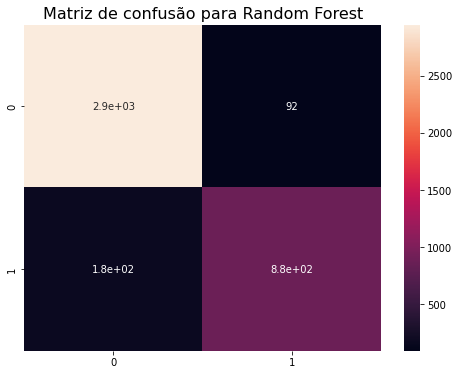

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Matriz de confusão para Random Forest', fontsize=16)

sns.heatmap(cm_rf, annot=True)
plt.show()

## Conclusões

Após limpar os dados, acabamos com um dataframe com targets desbalanceados. Isto foi uma característica que fez alguns modelos performarem mal para a predição de classes com menos amostras no dataframe. Conseguimos analisar isso por meio do classification report após aplicar cross validação nos dados de treino e realizar predições nos dados de teste em cada modelo.

Assim, contornamos o problema aplicando um método de ML que lida bem com dados desbalanceados, aumentando o escore f1 de todas as classes: a Random Forest Classifier.

## Referências

[How, when and why should we normalize/standardize our data](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Standardization%20is%20useful%20when%20your,regression%2C%20and%20linear%20discriminant%20analysis.)

[Dealing with imbalanced data](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Standardization%20is%20useful%20when%20your,regression%2C%20and%20linear%20discriminant%20analysis.)